## Notebook Setup

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
path_to_data = './data/audit_data.csv'
data = pd.read_csv(path_to_data)

# Display the first few rows of the dataset
data.head()


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [2]:
sum(data.dtypes == "object"), (data.dtypes == "object")[(data.dtypes == "object") == True]

(1,
 LOCATION_ID    True
 dtype: bool)

In [3]:

label_encoder = LabelEncoder()

data['LOCATION_ID'] = label_encoder.fit_transform(data['LOCATION_ID'])
sum(data.dtypes == "object")

0

## Data Overview

### Number of individuals and features

In [4]:
num_individuals, num_features = data.shape
print(f'Number of individuals: {num_individuals}, Number of features: {num_features}')


Number of individuals: 776, Number of features: 27


### Number of observations per class

In [5]:
class_counts = data['Risk'].value_counts()  
print('Observations per class:\n', class_counts)

Observations per class:
 Risk
0    471
1    305
Name: count, dtype: int64


### Mean by class


In [6]:
mean_by_class = data.groupby('Risk').mean()  
mean_by_class

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Risk,,,,,,,,,,,,,,,,,,,,,
0,27.892611,20.881104,0.720446,0.264544,0.285635,0.447667,0.226327,0.160085,1.168113,5.002123,...,0.200849,0.422930,0.002123,0.200425,0.000849,2.159660,1.964002,0.423779,0.5,0.416806
1,8.281246,17.383607,5.121379,0.485246,2.996276,26.786689,0.447213,15.868164,31.827412,5.168852,...,0.214426,0.667541,0.262295,0.241967,0.135082,3.540984,41.951181,0.802623,0.5,17.594018


### Mean, Min, Max, Median, Standard deviation, Variance

In [7]:
data.describe().loc[['mean', 'std', 'min', 'max', '50%']]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
mean,20.184536,19.506443,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,14.771724,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000
50%,3.890000,13.000000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000


In [8]:
variance = data.var()
variance

Sector_score       591.414594
LOCATION_ID        218.203829
PARA_A              32.249569
Score_A              0.030295
Risk_A              11.836673
PARA_B            2508.369354
Score_B              0.028833
Risk_B             904.376007
TOTAL             2633.006447
numbers              0.069933
Score_B.1            0.006456
Risk_C               0.288817
Money_Value       4436.428411
Score_MV             0.025519
Risk_D            1597.668770
District_Loss        1.509651
PROB                 0.001407
RiSk_E               0.084281
History              0.281994
Prob                 0.004622
Risk_F               0.093535
Score                0.737748
Inherent_Risk     2996.494292
CONTROL_RISK         0.197653
Detection_Risk       0.000000
Audit_Risk        1495.175085
Risk                 0.238868
dtype: float64

In [9]:
(data.isnull().sum()>0)[(data.isnull().sum()>0) == True]

Money_Value    True
dtype: bool

In [10]:
data['Money_Value'].ffill(inplace=True)

In [11]:
(data.isnull().sum()>0)[(data.isnull().sum()>0) == True]

Series([], dtype: bool)

## Training a Multilayer Perceptron Classifier without dimensionality reduction

In [12]:
# Splitting the data into training and testing sets
X = data.drop(columns=['Risk'])  
y = data['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Training a Multilayer Perceptron Classifier without dimensionality reduction
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.98      1.00      0.99        60

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



### Feature selection using correlation, Fisher score, and mutual information


#### Correlation

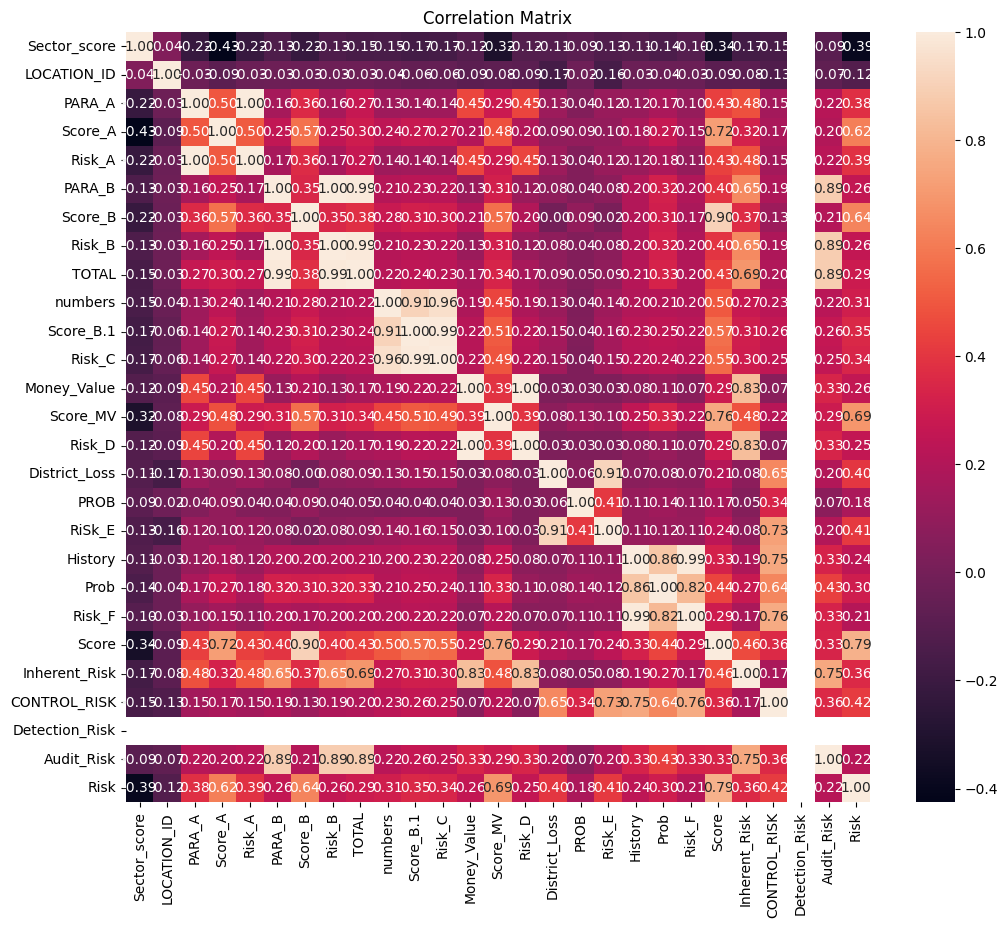

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### SelectKBest with ANOVA F-statistic

In [14]:
best_features_fisher = SelectKBest(score_func=f_classif, k=10).fit(X_train_scaled, y_train)
X_train_fisher = best_features_fisher.transform(X_train_scaled)
X_test_fisher = best_features_fisher.transform(X_test_scaled)

In [15]:
X_train_scaled.shape, X_train_fisher.shape

((620, 26), (620, 10))

In [16]:
mlp_fisher = MLPClassifier(random_state=42)
mlp_fisher.fit(X_train_fisher, y_train)

# Predictions and evaluation
y_pred = mlp_fisher.predict(X_test_fisher)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        96
           1       0.95      1.00      0.98        60

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



#### SelectKBest with mutual information

In [17]:
best_features_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10).fit(X_train_scaled, y_train)
X_train_mutual = best_features_mutual_info.transform(X_train_scaled)
X_test_mutual = best_features_mutual_info.transform(X_test_scaled)

In [18]:
X_train_scaled.shape, X_train_mutual.shape

((620, 26), (620, 10))

In [19]:
mlp_mutual = MLPClassifier(random_state=42)
mlp_mutual.fit(X_train_mutual, y_train)

# Predictions and evaluation
y_pred = mlp_mutual.predict(X_test_mutual)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        96
           1       0.91      0.80      0.85        60

    accuracy                           0.89       156
   macro avg       0.89      0.87      0.88       156
weighted avg       0.89      0.89      0.89       156



### Using Sequential Feature Selection (SFS, SBS, BDS)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


# SFS
sfs = SFS(MLPClassifier(random_state=42), 
          n_features_to_select=10, 
          direction='forward', 
          scoring='accuracy', 
          cv=5)

sfs.fit(X_train_scaled, y_train)

In [23]:
# Train MLP on selected features from SFS
mlp_sfs = MLPClassifier(random_state=42)
mlp_sfs.fit(sfs.transform(X_train_scaled), y_train)
y_pred_sfs = mlp_sfs.predict(sfs.transform(X_test_scaled))
print('SFS Classification Report:\n', classification_report(y_test, y_pred_sfs))

SFS Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        96
           1       0.97      1.00      0.98        60

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



### Compare the results obtained with and without selection of variables

In [24]:

results_comparison = {
    'Without Dimensionality Reduction': classification_report(y_test, y_pred, output_dict=True),
    'With SFS': classification_report(y_test, y_pred_sfs, output_dict=True)
}

print(results_comparison)


{'Without Dimensionality Reduction': {'0': {'precision': 0.883495145631068, 'recall': 0.9479166666666666, 'f1-score': 0.914572864321608, 'support': 96.0}, '1': {'precision': 0.9056603773584906, 'recall': 0.8, 'f1-score': 0.8495575221238938, 'support': 60.0}, 'accuracy': 0.8910256410256411, 'macro avg': {'precision': 0.8945777614947793, 'recall': 0.8739583333333334, 'f1-score': 0.8820651932227509, 'support': 156.0}, 'weighted avg': {'precision': 0.8920202347569998, 'recall': 0.8910256410256411, 'f1-score': 0.8895669634763333, 'support': 156.0}}, 'With SFS': {'0': {'precision': 1.0, 'recall': 0.9791666666666666, 'f1-score': 0.9894736842105263, 'support': 96.0}, '1': {'precision': 0.967741935483871, 'recall': 1.0, 'f1-score': 0.9836065573770492, 'support': 60.0}, 'accuracy': 0.9871794871794872, 'macro avg': {'precision': 0.9838709677419355, 'recall': 0.9895833333333333, 'f1-score': 0.9865401207937877, 'support': 156.0}, 'weighted avg': {'precision': 0.9875930521091811, 'recall': 0.9871794